In [1]:
import pandas as pd
from google.colab import files

df = files.upload()
data = pd.read_csv('Financial_Sentiment.csv')

Saving Financial_Sentiment.csv to Financial_Sentiment.csv


**EDA (Exploratory Data Analysis)**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [4]:
data.head(50)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
5,$SPY wouldn't be surprised to see a green close,positive
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative
8,Kone 's net sales rose by some 14 % year-on-ye...,positive
9,The Stockmann department store will have a tot...,neutral


In [6]:
data.shape

(5842, 2)

In [7]:
data.isnull().sum()

,0
Sentence,0
Sentiment,0


In [14]:
data[data.duplicated()]

,Sentence,Sentiment
1825,Proha Plc ( Euronext :7327 ) announced today (...,neutral
1859,SSH Communications Security Corporation is hea...,neutral
2672,Ahlstrom 's share is quoted on the NASDAQ OMX ...,neutral
3272,The company serves customers in various indust...,neutral
3986,The issuer is solely responsible for the conte...,neutral
5342,The report profiles 614 companies including ma...,neutral


**Data Visualization**

Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64


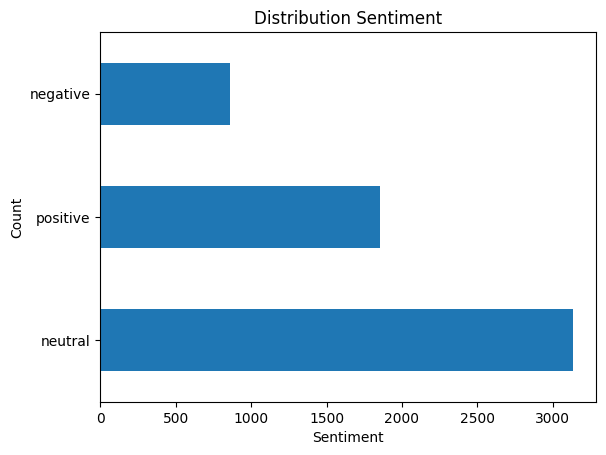

In [15]:
import matplotlib.pyplot as plt

Sentiment = data['Sentiment'].value_counts()
print(Sentiment)

plt.figure()
Sentiment.plot(kind='barh')
plt.title("Distribution Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

count    5842.000000
mean       21.004793
std        10.306465
min         2.000000
25%        13.000000
50%        19.000000
75%        27.000000
max        81.000000
Name: TextLength, dtype: float64


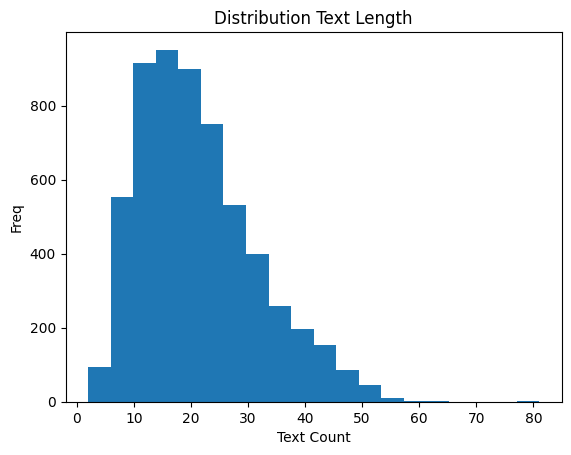

In [21]:
data["TextLength"] = data['Sentence'].astype(str).apply(lambda x : len(x.split(

)))


print(data["TextLength"].describe())

plt.figure()
plt.hist(data['TextLength'], bins=20)
plt.title("Distribution Text Length")
plt.xlabel("Text Count")
plt.ylabel("Freq")
plt.show()

<Figure size 640x480 with 0 Axes>

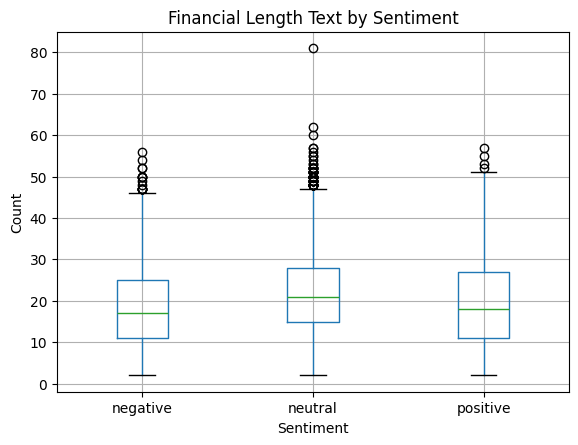

In [22]:
plt.figure()
data.boxplot(column='TextLength', by = 'Sentiment')
plt.title("Financial Length Text by Sentiment")
plt.suptitle("")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

**Data Cleaning**

In [75]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))

negation_words = {
    "no","not","nor","never","cannot","can't","won't",
    "don't","didn't","isn't","aren't","wasn't","weren't",
    "shouldn't","wouldn't","couldn't", "haven't"
}

stop_words = stop_words - negation_words

lemmatizer = WordNetLemmatizer()

def Normalisasi_Negasi(text):
  text = re.sub(r"won\s*[’']?\s*t", "will not", text)
  text = re.sub(r"can\s*[’']?\s*t", "cannot", text)
  text = re.sub(r"haven\s*[’']?\s*t", "have not", text)
  text = re.sub(r"hasn\s*[’']?\s*t", "has not", text)
  text = re.sub(r"hadn\s*[’']?\s*t", "had not", text)
  text = re.sub(r"don\s*[’']?\s*t", "do not", text)
  text = re.sub(r"didn\s*[’']?\s*t", "did not", text)
  text = re.sub(r"isn\s*[’']?\s*t", "is not", text)
  text = re.sub(r"aren\s*[’']?\s*t", "are not", text)
  text = re.sub(r"wasn\s*[’']?\s*t", "was not", text)
  text = re.sub(r"weren\s*[’']?\s*t", "were not", text)
  text = re.sub(r"shouldn\s*[’']?\s*t", "should not", text)
  text = re.sub(r"wouldn\s*[’']?\s*t", "would not", text)
  text = re.sub(r"couldn\s*[’']?\s*t", "could not", text)
  return text

def Normalisasi_URL(text):
  text = re.sub(r"https?\s*:\s*/\s*/", "https://", text)
  text = re.sub(r"www\s*\.\s*", "www.", text)
  text = re.sub(r"\s*\#\s*", "#", text)
  text = re.sub(r"\s*\$\s*", "$", text)
  return text

def handle_negation(text):
  text = re.sub(r"\bnot\s+bad\b", "not_bad", text)
  text = re.sub(r"\bnot\s+good\b", "not_good", text)
  text = re.sub(r"\bnot\s+great\b", "not_great", text)
  text = re.sub(r"\bnot\s+profitable\b", "not_profitable", text)
  text = re.sub(r"\bnot\s+profitable\s+yet\b", "not_profitable_yet", text)
  text = re.sub(r"\bnot\s+generating\s+profit\b", "not_generating_profit", text)
  text = re.sub(r"\bnot\s+generating\s+revenue\b", "not_generating_revenue", text)
  text = re.sub(r"\bnot\s+making\s+profit\b", "not_making_profit", text)
  text = re.sub(r"\bnot\s+growing\b", "not_growing", text)
  text = re.sub(r"\bnot\s+increasing\b", "not_increasing", text)
  text = re.sub(r"\bnot\s+improving\b", "not_improving", text)
  text = re.sub(r"\bnot\s+expanding\b", "not_expanding", text)
  text = re.sub(r"\bnot\s+rising\b", "not_rising", text)
  text = re.sub(r"\bnot\s+stable\b", "not_stable", text)
  text = re.sub(r"\bnot\s+sustainable\b", "not_sustainable", text)
  text = re.sub(r"\bnot\s+secure\b", "not_secure", text)
  text = re.sub(r"\bnot\s+safe\b", "not_safe", text)
  text = re.sub(r"\bnot\s+certain\b", "not_certain", text)
  text = re.sub(r"\bnot\s+meet\s+expactions\b", "not_expactions", text)
  text = re.sub(r"\bnot\s+meet\s+forecast\b", "not_meet_forecast", text)
  text = re.sub(r"\bnot\s+meet\s+target\b", "not_meet_target", text)
  text = re.sub(r"\bnot\s+meet\s+guidance\b", "not_meet_guidance", text)
  return text


def clean_text(text):
  text = text.lower().strip()
  text = Normalisasi_Negasi(text)
  text = Normalisasi_URL(text)
  text = handle_negation(text)

  if len(re.findall(r"[a-z]", text)) < 4:
    return ""

  text = re.sub(r"https?://\S+|www\.\S+", " ", text)
  text = re.sub(r"\$", " dollar_", text)
  text = re.sub(r"#\s*\w+", " ", text)
  text = re.sub(r"\$(\d+(\.\d+)?)", r"dollar_\1", text)
  text = re.sub(r"(.)\1{2,}", r"\1\1", text)
  text = re.sub(r"\b[b-df-hj-np-tv-z]{5,}\b", " ", text)
  text = re.sub(r"(?<=\d)[,\.](?=\d)", "", text)
  text = re.sub(r"[^a-z0-9_\.\s]", " ", text)
  text = re.sub(r"\s+", " ", text).strip()

  tokens = [
      lemmatizer.lemmatize(x)
      for x in text.split()
      if x not in stop_words and (len(x) >= 2 or x in negation_words)
  ]

  return " ".join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [76]:
data["Clean_Text"] = data["Sentence"].apply(clean_text)

In [77]:
data[["Sentence", "Clean_Text","Sentiment"]].head(100)

,Sentence,Clean_Text,Sentiment
0,The GeoSolutions technology will leverage Bene...,geosolutions technology leverage benefon gps s...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",dollar_esi low dollar_150 dollar_250 bk real p...,negative
2,"For the last quarter of 2010 , Componenta 's n...",last quarter 2010 componenta net sale doubled ...,positive
3,According to the Finnish-Russian Chamber of Co...,according finnish russian chamber commerce maj...,neutral
4,The Swedish buyout firm has sold its remaining...,swedish buyout firm sold remaining 224 percent...,neutral
...,...,...,...
95,M-Real said there are ` no grounds ' for the r...,real said no ground rumor circulating market m...,neutral
96,Lember said the matter was topical also in Est...,lember said matter topical also estonia bill d...,neutral
97,- Moody 's said it gave P A1 long-term senior ...,moody said gave a1 long term senior unsecured ...,neutral
98,$TSLA recall,dollar_tsla recall,negative


In [79]:
data = data[data['Clean_Text'].str.strip() != ""]
data = data.reset_index(drop=True)

In [80]:
data.shape

(5842, 5)

**Encode**

In [83]:
label = {
    "negative":0,
    "positive":1,
    "neutral" :2
}

data["Label"] = data["Sentiment"].map(label)

In [84]:
data[["Clean_Text","Label"]].head(10)

,Clean_Text,Label
0,geosolutions technology leverage benefon gps s...,1
1,dollar_esi low dollar_150 dollar_250 bk real p...,0
2,last quarter 2010 componenta net sale doubled ...,1
3,according finnish russian chamber commerce maj...,2
4,swedish buyout firm sold remaining 224 percent...,2
5,dollar_spy would not surprised see green close,1
6,shell dollar_70 billion bg deal meet sharehold...,0
7,ssh communication security corp stock exchange...,0
8,kone net sale rose 14 year year first nine mon...,1
9,stockmann department store total floor space 8...,2


**Modelling**

In [85]:
from sklearn.model_selection import train_test_split

X = data.Clean_Text
y = data['Label']


TrainX,ValX,TrainY,ValY = train_test_split(X,y,test_size=0.2,
                                           random_state=42,
                                           stratify=y)

len(TrainX),len(ValX)

(4673, 1169)

In [150]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=8000,
                        ngram_range=(1,3))

TrainXTF = tfidf.fit_transform(TrainX)
ValXTF = tfidf.transform(ValX)

TrainXTF.shape, ValXTF.shape

((4673, 8000), (1169, 8000))

In [151]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(
    max_iter = 1000,
    class_weight = 'balanced'
)

model.fit(TrainXTF,TrainY)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [152]:
from sklearn.metrics import accuracy_score, classification_report


y_pred = model.predict(ValXTF)

print("Model Accuration:", accuracy_score(ValY,y_pred))
print(classification_report(ValY,y_pred))

Model Accuration: 0.6860564585115483
              precision    recall  f1-score   support

           0       0.36      0.46      0.40       172
           1       0.72      0.69      0.71       371
           2       0.79      0.74      0.76       626

    accuracy                           0.69      1169
   macro avg       0.62      0.63      0.62      1169
weighted avg       0.70      0.69      0.69      1169



**SVC**

In [153]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

param_grid = {
    "C": [0.1,0.5,1,2,5]
}

svc = LinearSVC(
    class_weight = "balanced"
)

grid = GridSearchCV(
    svc,
    param_grid,
    scoring = "f1_macro",
    cv = 5,
    n_jobs = -1,
    verbose=1
)

grid.fit(TrainXTF,TrainY)


print("Best C:", grid.best_params_)
print("Best CV F1:", grid.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best C: {'C': 0.1}
Best CV F1: 0.5837722731226747


In [154]:
SVC = LinearSVC(
    C = 0.1,
    class_weight = 'balanced',
    dual = False,
    max_iter = 5000
)

SVC.fit(TrainXTF,TrainY)

LinearSVC(C=0.1, class_weight='balanced', dual=False, max_iter=5000)

In [156]:
y_pred_SVC = SVC.predict(ValXTF)

print("Accuracy Model:", accuracy_score(ValY, y_pred_SVC))
print(classification_report(ValY, y_pred_SVC))

Accuracy Model: 0.6809238665526091
              precision    recall  f1-score   support

           0       0.33      0.32      0.33       172
           1       0.75      0.63      0.68       371
           2       0.73      0.81      0.77       626

    accuracy                           0.68      1169
   macro avg       0.60      0.59      0.59      1169
weighted avg       0.68      0.68      0.68      1169

